In [ ]:
import tensorflow as tf

import os
import time

from matplotlib import pyplot as plt
from IPython import display



PATH = "/content/drive/MyDrive/Eslami/mix/"


from google.colab import drive
drive.mount('/content/drive')

Drive already mounted at /content/drive; to attempt to forcibly remount, call drive.mount("/content/drive", force_remount=True).


In [ ]:
BUFFER_SIZE = 400
BATCH_SIZE = 1
IMG_WIDTH = 256
IMG_HEIGHT = 256
OUTPUT_CHANNELS = 3



"""
train_path = PATH + 'train'
test_path = PATH + 'val'
print(train_path)
print(test_path)



training_set_path = []
for path in os.listdir(train_path):
  training_set_path.append(train_path + '/' + path)
training_set_path = training_set_path.shuffle(BUFFER_SIZE)



testing_set_path = []
for path in os.listdir(test_path):
  testing_set_path.append(test_path + '/' + path)
testing_set_path = testing_set_path.shuffle(BUFFER_SIZE)



training_set = []
for path in training_set_path:
  image = tf.io.read_file(path)
  image = tf.image.decode_jpeg(image)
  image = tf.cast(image, tf.float32) / 127.5 - 1
  image = tf.image.resize(image, [image_width, image_height*2], method=tf.image.ResizeMethod.NEAREST_NEIGHBOR)
  training_set.append(image)



testing_set = []
for path in testing_set_path:
  image = tf.io.read_file(path)
  image = tf.image.decode_jpeg(image)
  image = tf.cast(image, tf.float32) / 127.5 - 1
  image = tf.image.resize(image, [image_width, image_height*2], method=tf.image.ResizeMethod.NEAREST_NEIGHBOR)
  testing_set.append(image)




row, col, channel = tf.shape(training_set[0])
print(tf.shape(training_set[0]))
c = col // 2



real_input_training_set = []
real_output_training_set = []
for i in training_set:
  real_input_training_set.append(i[:, :c, :])
  real_output_training_set.append(i[:, c:, :])



real_input_testing_set = []
real_output_testing_set = []
for i in range (len(testing_set)):
  real_input_testing_set.append(testing_set[i][:, :c, :])
  real_output_testing_set.append(testing_set[i][:, c:, :])
"""
def load(image_file):
  image = tf.io.read_file(image_file)
  print(f"image : \n {image}")
  image = tf.image.decode_jpeg(image)
  print(f"image : \n {image}")

  w = tf.shape(image)[1]
  print(f"w : \n {w}")

  w = w // 2
  print(f"w : \n {w}")
  input_image = image[:, :w, :]
  real_image = image[:, w:, :]

  input_image = tf.cast(input_image, tf.float32)
  real_image = tf.cast(real_image, tf.float32)
  print(f"input_image.shape : \n {input_image.shape}")
  


  return input_image, real_image




def resize(input_image, real_image, height, width):
  input_image = tf.image.resize(input_image, [height, width], method=tf.image.ResizeMethod.NEAREST_NEIGHBOR)
  real_image = tf.image.resize(real_image, [height, width], method=tf.image.ResizeMethod.NEAREST_NEIGHBOR)
  return input_image, real_image

def random_crop(input_image, real_image):
  stacked_image = tf.stack([input_image, real_image], axis=0)
  cropped_image = tf.image.random_crop(stacked_image, size=[2, IMG_HEIGHT, IMG_WIDTH, 3])
  return cropped_image[0], cropped_image[1]

# normalizing the images to [-1, 1]
def normalize(input_image, real_image):
  input_image = (input_image / 127.5) - 1
  real_image = (real_image / 127.5) - 1
  return input_image, real_image


@tf.function()
def random_jitter(input_image, real_image):
  # resizing to 286 x 286 x 3
  input_image, real_image = resize(input_image, real_image, 286, 286)

  # randomly cropping to 256 x 256 x 3
  input_image, real_image = random_crop(input_image, real_image)

  if tf.random.uniform(()) > 0.5:
    # random mirroring
    input_image = tf.image.flip_left_right(input_image)
    real_image = tf.image.flip_left_right(real_image)

  return input_image, real_image




def load_image_train(image_file):
  input_image, real_image = load(image_file)
  input_image, real_image = random_jitter(input_image, real_image)
  input_image, real_image = normalize(input_image, real_image)
  return input_image, real_image



def load_image_test(image_file):
  input_image, real_image = load(image_file)
  input_image, real_image = resize(input_image, real_image, IMG_HEIGHT, IMG_WIDTH)
  input_image, real_image = normalize(input_image, real_image)
  return input_image, real_image




train_dataset = tf.data.Dataset.list_files(PATH+'*.jpg')
train_dataset = train_dataset.map(load_image_train, num_parallel_calls=tf.data.experimental.AUTOTUNE)
train_dataset = train_dataset.shuffle(BUFFER_SIZE)
train_dataset = train_dataset.batch(BATCH_SIZE)
print(f"list(train_dataset.as_numpy_iterator()) : \n {list(train_dataset.as_numpy_iterator())}")
print(list(train_dataset))

print("-----------------------------------------------------------------------")

print("***********************************************************************")
print(len(list(train_dataset)))
print(list(train_dataset)[0])


"""
test_dataset = tf.data.Dataset.list_files(PATH+'val/*.jpg')
test_dataset = test_dataset.map(load_image_test)
test_dataset = test_dataset.batch(BATCH_SIZE)
"""

Streaming output truncated to the last 5000 lines.
         [ 0.17647064,  0.09803927,  0.00392163],
         ...,
         [ 0.04313731, -0.00392157, -0.09803921],
         [ 0.02745104, -0.00392157, -0.09803921],
         [ 0.1686275 ,  0.13725495,  0.05098045]],

        [[ 0.20000005,  0.12156868,  0.02745104],
         [ 0.20000005,  0.12156868,  0.02745104],
         [ 0.19215691,  0.11372554,  0.0196079 ],
         ...,
         [ 0.00392163, -0.04313725, -0.1372549 ],
         [ 0.12156868,  0.07450986, -0.01960784],
         [ 0.10588241,  0.07450986, -0.01176471]],

        [[ 0.20000005,  0.12156868,  0.02745104],
         [ 0.20784318,  0.12941182,  0.03529418],
         [ 0.22352946,  0.14509809,  0.05098045],
         ...,
         [ 0.09803927,  0.05098045, -0.04313725],
         [ 0.20784318,  0.16078436,  0.06666672],
         [ 0.15294123,  0.09803927,  0.0196079 ]],

        ...,

        [[ 0.70980394,  0.67058825,  0.64705884],
         [ 0.5921569 ,  0.52156866,  

"\ntest_dataset = tf.data.Dataset.list_files(PATH+'val/*.jpg')\ntest_dataset = test_dataset.map(load_image_test)\ntest_dataset = test_dataset.batch(BATCH_SIZE)\n"

image : 
 b'\xff\xd8\xff\xe0\x00\x10JFIF\x00\x01\x01\x00\x00\x01\x00\x01\x00\x00\xff\xdb\x00C\x00\x02\x01\x01\x01\x01\x01\x02\x01\x01\x01\x02\x02\x02\x02\x02\x04\x03\x02\x02\x02\x02\x05\x04\x04\x03\x04\x06\x05\x06\x06\x06\x05\x06\x06\x06\x07\t\x08\x06\x07\t\x07\x06\x06\x08\x0b\x08\t\n\n\n\n\n\x06\x08\x0b\x0c\x0b\n\x0c\t\n\n\n\xff\xdb\x00C\x01\x02\x02\x02\x02\x02\x02\x05\x03\x03\x05\n\x07\x06\x07\n\n\n\n\n\n\n\n\n\n\n\n\n\n\n\n\n\n\n\n\n\n\n\n\n\n\n\n\n\n\n\n\n\n\n\n\n\n\n\n\n\n\n\n\n\n\n\n\n\n\xff\xc0\x00\x11\x08\x01\x00\x02\x00\x03\x01"\x00\x02\x11\x01\x03\x11\x01\xff\xc4\x00\x1f\x00\x00\x01\x05\x01\x01\x01\x01\x01\x01\x00\x00\x00\x00\x00\x00\x00\x00\x01\x02\x03\x04\x05\x06\x07\x08\t\n\x0b\xff\xc4\x00\xb5\x10\x00\x02\x01\x03\x03\x02\x04\x03\x05\x05\x04\x04\x00\x00\x01}\x01\x02\x03\x00\x04\x11\x05\x12!1A\x06\x13Qa\x07"q\x142\x81\x91\xa1\x08#B\xb1\xc1\x15R\xd1\xf0$3br\x82\t\n\x16\x17\x18\x19\x1a%&\'()*456789:CDEFGHIJSTUVWXYZcdefghijstuvwxyz\x83\x84\x85\x86\x87\x88\x89\x8a\x92\x93\x94\x9

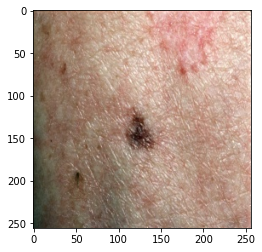

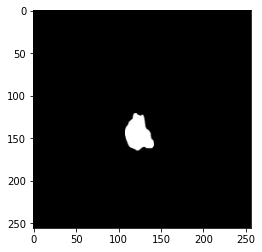

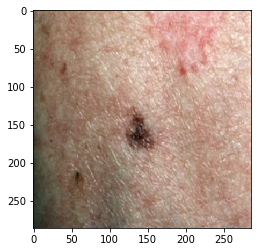

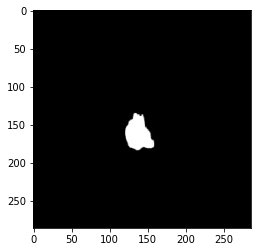

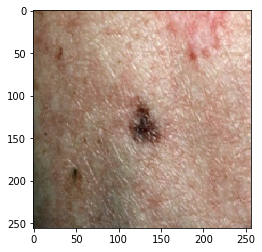

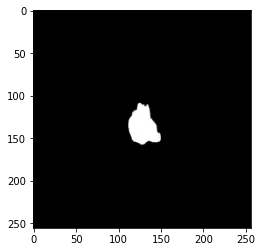

In [ ]:
"""
plt.figure(1)
plt.imshow(real_input_training_set[100])
plt.figure(2)
plt.imshow(real_output_training_set[100])
plt.show()
"""

inp1, re1 = load(PATH+'10.jpg')
inp2, re2 = resize(inp1, re1, 286, 286)
inp3, re3 = random_crop(inp2, re2)


plt.figure()
plt.imshow(inp1/255.0)
plt.figure()
plt.imshow(re1/255.0)

plt.figure()
plt.imshow(inp2/255.0)
plt.figure()
plt.imshow(re2/255.0)

plt.figure()
plt.imshow(inp3/255.0)
plt.figure()
plt.imshow(re3/255.0)



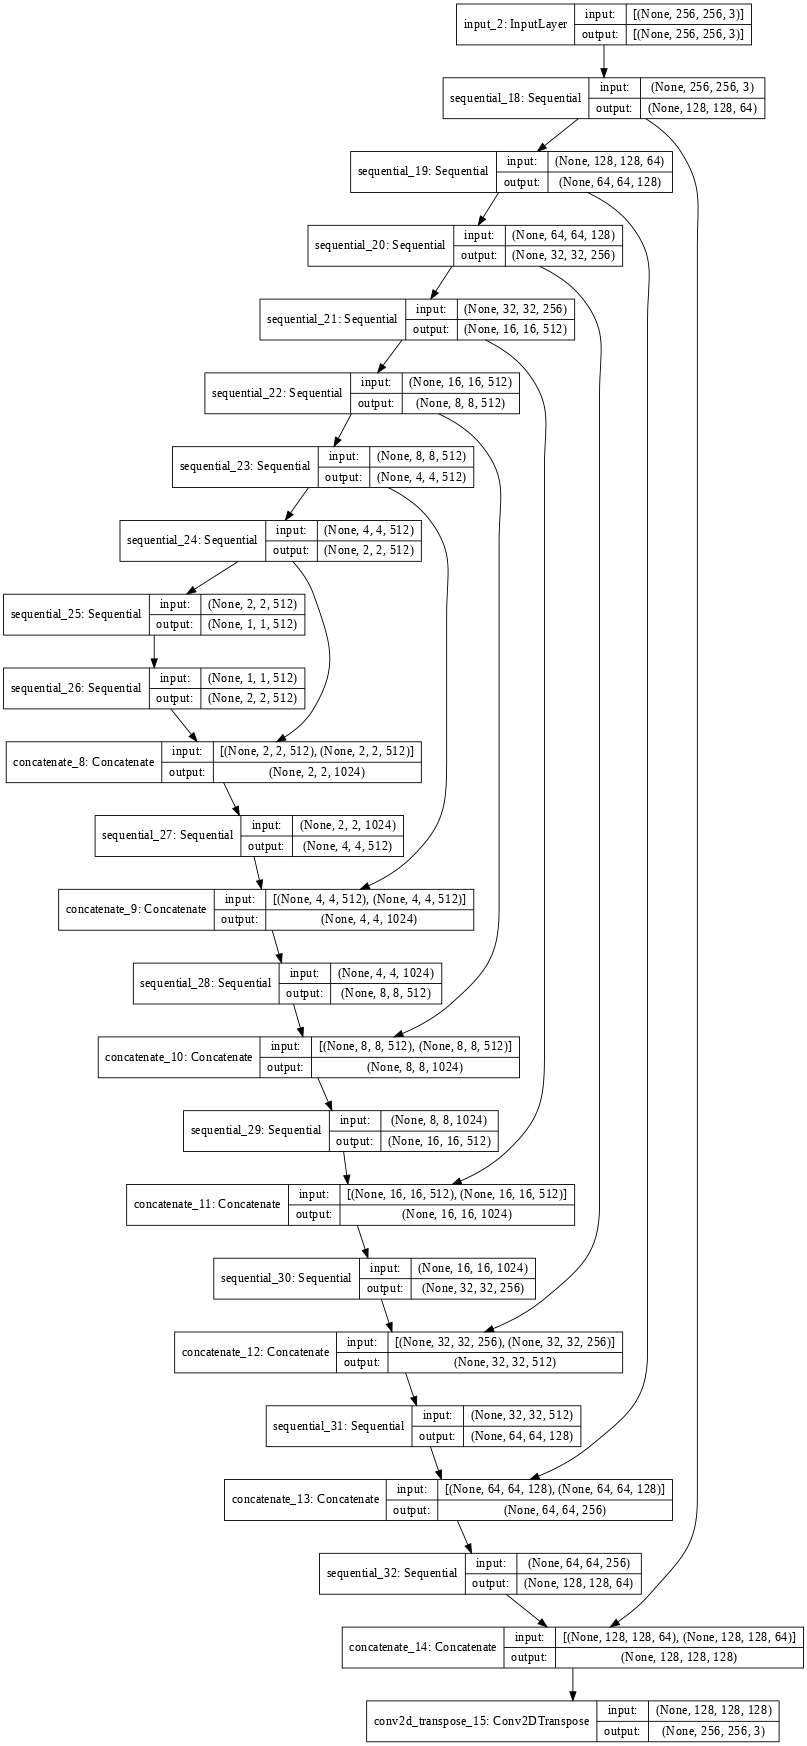

In [ ]:
def downsample(filters, size, apply_batchnorm=True):
  initializer = tf.random_normal_initializer(0., 0.02)

  result = tf.keras.Sequential()
  result.add(
      tf.keras.layers.Conv2D(filters, size, strides=2, padding='same',
                             kernel_initializer=initializer, use_bias=False))

  if apply_batchnorm:
    result.add(tf.keras.layers.BatchNormalization())

  result.add(tf.keras.layers.LeakyReLU())

  return result




def upsample(filters, size, apply_dropout=False):
  initializer = tf.random_normal_initializer(0., 0.02)

  result = tf.keras.Sequential()
  result.add(tf.keras.layers.Conv2DTranspose(filters, size, strides=2, padding='same', kernel_initializer=initializer, use_bias=False))

  result.add(tf.keras.layers.BatchNormalization())

  if apply_dropout:
      result.add(tf.keras.layers.Dropout(0.5))

  result.add(tf.keras.layers.ReLU())

  return result



def Generator():
  inputs = tf.keras.layers.Input(shape=[256,256,3])

  down_stack = [
    downsample(64, 4, apply_batchnorm=False), # (bs, 128, 128, 64)
    downsample(128, 4), # (bs, 64, 64, 128)
    downsample(256, 4), # (bs, 32, 32, 256)
    downsample(512, 4), # (bs, 16, 16, 512)
    downsample(512, 4), # (bs, 8, 8, 512)
    downsample(512, 4), # (bs, 4, 4, 512)
    downsample(512, 4), # (bs, 2, 2, 512)
    downsample(512, 4), # (bs, 1, 1, 512)
  ]

  up_stack = [
    upsample(512, 4, apply_dropout=True), # (bs, 2, 2, 1024)
    upsample(512, 4, apply_dropout=True), # (bs, 4, 4, 1024)
    upsample(512, 4, apply_dropout=True), # (bs, 8, 8, 1024)
    upsample(512, 4), # (bs, 16, 16, 1024)
    upsample(256, 4), # (bs, 32, 32, 512)
    upsample(128, 4), # (bs, 64, 64, 256)
    upsample(64, 4), # (bs, 128, 128, 128)
  ]

  initializer = tf.random_normal_initializer(0., 0.02)
  last = tf.keras.layers.Conv2DTranspose(3, 4, strides=2, padding='same', kernel_initializer=initializer, activation='tanh') # (bs, 256, 256, 3)

  x = inputs

  # Downsampling through the model
  skips = []
  for down in down_stack:
    x = down(x)
    skips.append(x)

  skips = reversed(skips[:-1])

  # Upsampling and establishing the skip connections
  for up, skip in zip(up_stack, skips):
    x = up(x)
    x = tf.keras.layers.Concatenate()([x, skip])

  x = last(x)

  return tf.keras.Model(inputs=inputs, outputs=x)


generator = Generator()
tf.keras.utils.plot_model(generator, show_shapes=True, dpi=64)

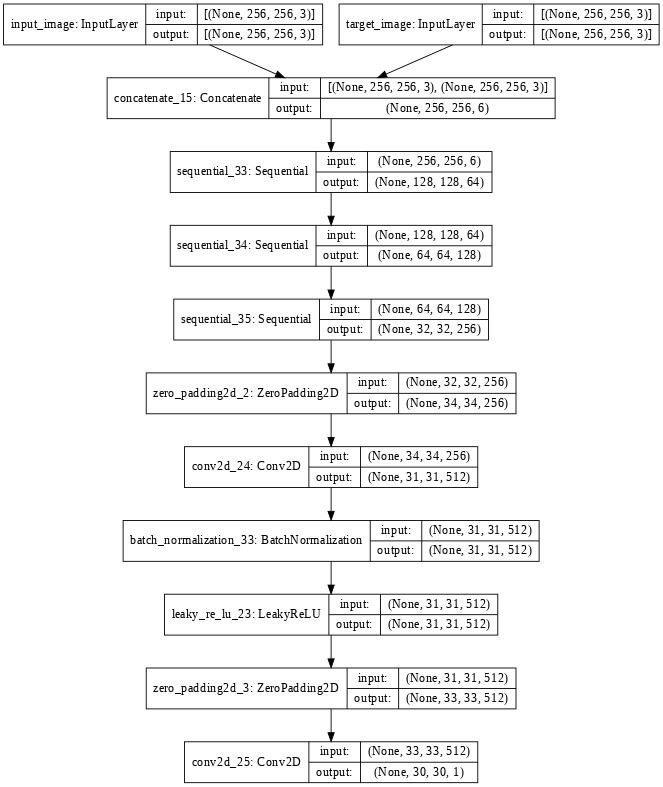

In [ ]:
def Discriminator():
  initializer = tf.random_normal_initializer(0., 0.02)

  inp = tf.keras.layers.Input(shape=[256, 256, 3], name='input_image')
  tar = tf.keras.layers.Input(shape=[256, 256, 3], name='target_image')

  x = tf.keras.layers.concatenate([inp, tar]) # (bs, 256, 256, channels*2)

  down1 = downsample(64, 4, False)(x) # (bs, 128, 128, 64)
  down2 = downsample(128, 4)(down1) # (bs, 64, 64, 128)
  down3 = downsample(256, 4)(down2) # (bs, 32, 32, 256)

  zero_pad1 = tf.keras.layers.ZeroPadding2D()(down3) # (bs, 34, 34, 256)
  conv = tf.keras.layers.Conv2D(512, 4, strides=1, kernel_initializer=initializer, use_bias=False)(zero_pad1) # (bs, 31, 31, 512)

  batchnorm1 = tf.keras.layers.BatchNormalization()(conv)

  leaky_relu = tf.keras.layers.LeakyReLU()(batchnorm1)

  zero_pad2 = tf.keras.layers.ZeroPadding2D()(leaky_relu) # (bs, 33, 33, 512)

  last = tf.keras.layers.Conv2D(1, 4, strides=1, kernel_initializer=initializer)(zero_pad2) # (bs, 30, 30, 1)

  return tf.keras.Model(inputs=[inp, tar], outputs=last)



discriminator = Discriminator()
tf.keras.utils.plot_model(discriminator, show_shapes=True, dpi=64)

In [ ]:
import datetime
log_dir="/content/drive/MyDrive/Eslami/log/"

summary_writer = tf.summary.create_file_writer(
  log_dir + "fit/" + datetime.datetime.now().strftime("%Y%m%d-%H%M%S"))



def generate_images(model, test_input, tar):
  prediction = model(test_input, training=True)
  plt.figure(figsize=(15,15))

  display_list = [test_input[0], tar[0], prediction[0]]
  title = ['Input Image', 'Ground Truth', 'Predicted Image']

  for i in range(3):
    plt.subplot(1, 3, i+1)
    plt.title(title[i])
    # getting the pixel values between [0, 1] to plot it.
    plt.imshow(display_list[i] * 0.5 + 0.5)
    plt.axis('off')
  plt.show()




In [ ]:
LAMBDA = 100
loss_object = tf.keras.losses.BinaryCrossentropy(from_logits=True)
generator_optimizer = tf.keras.optimizers.Adam(2e-4, beta_1=0.5)
discriminator_optimizer = tf.keras.optimizers.Adam(2e-4, beta_1=0.5)



def generator_loss(disc_generated_output, gen_output, target):
  gan_loss = loss_object(tf.ones_like(disc_generated_output), disc_generated_output)
  # mean absolute error
  l1_loss = tf.reduce_mean(tf.abs(target - gen_output))

  total_gen_loss = gan_loss + (LAMBDA * l1_loss)

  return total_gen_loss, gan_loss, l1_loss



def discriminator_loss(disc_real_output, disc_generated_output):
  real_loss = loss_object(tf.ones_like(disc_real_output), disc_real_output)

  generated_loss = loss_object(tf.zeros_like(disc_generated_output), disc_generated_output)

  total_disc_loss = real_loss + generated_loss

  return total_disc_loss



In [ ]:
checkpoint_dir = '/content/drive/MyDrive/Eslami/log/'
checkpoint_prefix = os.path.join(checkpoint_dir, "checkpoint1")
checkpoint = tf.train.Checkpoint(generator_optimizer=generator_optimizer,
                                 discriminator_optimizer=discriminator_optimizer,
                                 generator=generator,
                                 discriminator=discriminator)
ckpt_manager = tf.train.CheckpointManager(checkpoint, checkpoint_dir, max_to_keep=5)

# if a checkpoint exists, restore the latest checkpoint.
if ckpt_manager.latest_checkpoint:
    checkpoint.restore(ckpt_manager.latest_checkpoint)
    print('Latest checkpoint restored!!')

In [ ]:
EPOCHS = 151


def train_step(input_image, target, epoch):
  with tf.GradientTape() as gen_tape, tf.GradientTape() as disc_tape:
    gen_output = generator(input_image, training=True)

    disc_real_output = discriminator([input_image, target], training=True)
    disc_generated_output = discriminator([input_image, gen_output], training=True)

    gen_total_loss, gen_gan_loss, gen_l1_loss = generator_loss(disc_generated_output, gen_output, target)
    disc_loss = discriminator_loss(disc_real_output, disc_generated_output)

  generator_gradients = gen_tape.gradient(gen_total_loss, generator.trainable_variables)
  discriminator_gradients = disc_tape.gradient(disc_loss, discriminator.trainable_variables)

  generator_optimizer.apply_gradients(zip(generator_gradients, generator.trainable_variables))
  discriminator_optimizer.apply_gradients(zip(discriminator_gradients, discriminator.trainable_variables))

  with summary_writer.as_default():
    tf.summary.scalar('gen_total_loss', gen_total_loss, step=epoch)
    tf.summary.scalar('gen_gan_loss', gen_gan_loss, step=epoch)
    tf.summary.scalar('gen_l1_loss', gen_l1_loss, step=epoch)
    tf.summary.scalar('disc_loss', disc_loss, step=epoch)



def fit(train_ds, epochs):
  for epoch in range(epochs):
    start = time.time()

    display.clear_output(wait=True)

    for example_input, example_target in train_ds.take(1):
      generate_images(generator, example_input, example_target)
    print("Epoch: ", epoch)

    # Train
    for n, (input_image, target) in train_ds.enumerate():
      print('.', end='')
      if (n+1) % 100 == 0:
        print()
      train_step(input_image, target, epoch)
    print()

    # saving (checkpoint) the model every 20 epochs
    if (epoch + 1) % 50 == 0:
      checkpoint.save(file_prefix = checkpoint_prefix)

    print ('Time taken for epoch {} is {} sec\n'.format(epoch + 1, time.time()-start))


  checkpoint.save(file_prefix = checkpoint_prefix)


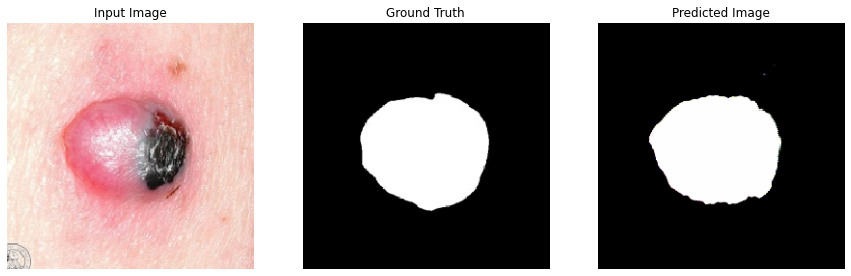

Epoch:  150
.............................................................................................
Time taken for epoch 151 is 17.746333599090576 sec



In [ ]:
fit(train_dataset, EPOCHS)

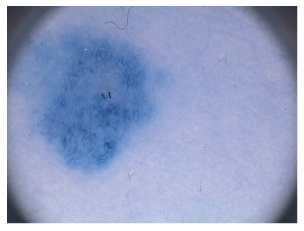

(256, 256, 3)


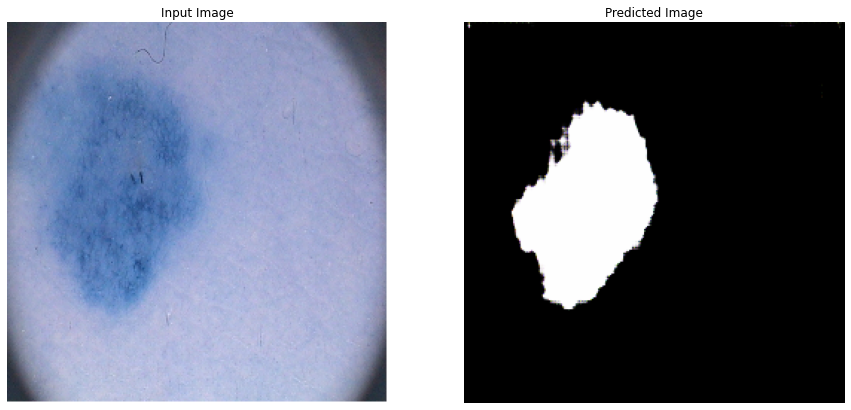

In [ ]:
import cv2
import numpy as np
Path_test='/content/drive/MyDrive/Eslami/test/IMD013.bmp'
Image_test = cv2.imread(Path_test)
Image_test1 = Image_test
Image_test = cv2.resize(Image_test,(256,256))
Image_test = Image_test/127.5 - 1
Image_test_new = np.zeros((1,256,256,3),dtype=np.float32)
Image_test_new[0]=Image_test
"""
test_dataset = tf.data.Dataset.list_files(Path_test)
test_dataset = test_dataset.map(load_image_test)
test_dataset = test_dataset.batch(1)
"""
plt.imshow(Image_test1,cmap='BrBG')
plt.axis('off')
plt.show()
def generate_images_test(model, test_input):
  prediction = model(test_input, training=True)
  plt.figure(figsize=(15,15))
  gray = cv2.cvtColor(np.array(prediction[0]),cv2.COLOR_BGR2GRAY)
  gray = (gray +1 )*127.5
  """for j in range(gray.shape[0]-1):
    for m in range(gray.shape[1]):
      if (gray[j-1,m]!=0 and gray[j,m]!=0):
        gray[j,m]=0"""
  #gray = cv2.Canny(np.uint8(gray), 90, 100)
  #gray = cv2.dilate(gray, None, iterations=1)
  #gray = cv2.erode(gray, None, iterations=1)
  
  gray= gray/127.5 -1
  ret,gray = cv2.threshold(gray,-0.75,1,cv2.THRESH_BINARY)
  display_list = [test_input[0], gray]
  title = ['Input Image','Predicted Image']

  print(prediction[0].shape)
  for i in range(2):
    plt.subplot(1, 2, i+1)
    plt.title(title[i])
    # getting the pixel values between [0, 1] to plot it.
    plt.imshow(display_list[i]* 0.5 + 0.5,cmap='gray' )
    plt.axis('off')
  plt.show()
generate_images_test(generator, Image_test_new)